In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

font = {'size'   : 12}

matplotlib.rc('font', **font)

In [2]:
def avg_search_time(df):
    search_time = df.loc[0, ['search_time', 'num_objects']].values
    search_time = search_time[0] / search_time[1]
    return search_time

def create_time(df):
    return df.loc[0, ['creation_time']].values[0] / 1000000

In [3]:
search_time = []

exp_map = {
    3: "fast_s100_c100",
    4: "fast_adaptive_s5_c100",
    5: "fast_adaptive_s20_c100",
    6: "fast_adaptive_s50_c100",
    7: "fast_adaptive_s5_c50",
    8: "fast_adaptive_s5_c25",
    9: "fast_adaptive_s25_c25",
    10: "fast_adaptive_s5_c10",
    11: "fast_adaptive_s10_c10",
    12: "fast_adaptive2_s4_c100",
    13: "fast_adaptive2_s4_c50",
    14: "fast_2_s50_c50"
}

dfs = []
for k, v in exp_map.items():
    df_sum = pd.read_csv(f"../results_05_10/FAST_KNN_NO_ObjIndex_adaptive_exp{k}.csv").reset_index()
    search_time.append({'name': v, 'search_time': avg_search_time(df_sum), 'creation_time': create_time(df_sum)})
    df = pd.read_csv(f"../results_05_10/FAST_KNN_NO_ObjIndex_adaptive_exp{k}_descend_timeline_1000000_100000.csv", names=['count']).reset_index()
    df['name'] = v
    dfs.append(df)

create_des = pd.concat(dfs)
create_des

,index,count,name
0,0,0,fast_s100_c100
1,1,0,fast_s100_c100
2,2,0,fast_s100_c100
3,3,0,fast_s100_c100
4,4,0,fast_s100_c100
...,...,...,...
999995,999995,5035000,fast_2_s50_c50
999996,999996,5035000,fast_2_s50_c50
999997,999997,5035000,fast_2_s50_c50
999998,999998,5035000,fast_2_s50_c50


## Descends over time

Text(0, 0.5, '# of descends')

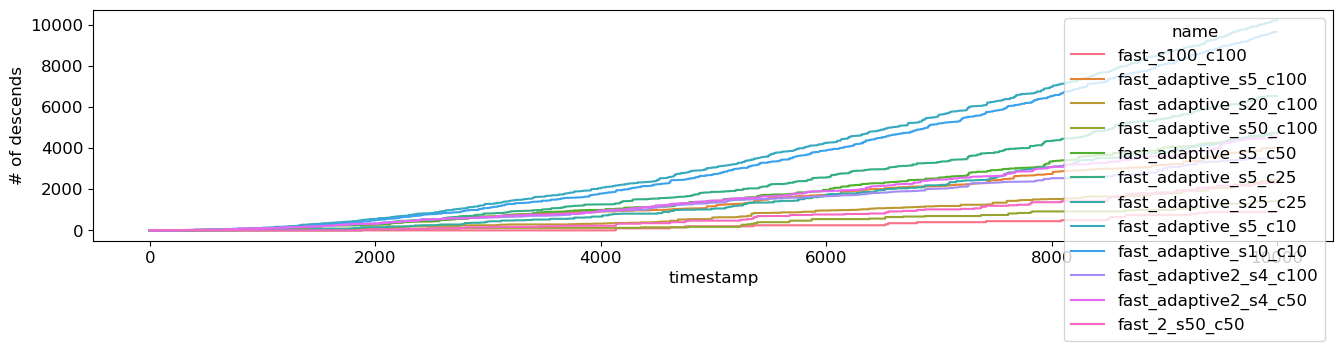

In [4]:
plt.figure(figsize=(16,3))
sns.lineplot(x='index', y='count', hue='name', data=create_des[create_des['index'] < 10000])
plt.xlabel('timestamp')
plt.ylabel('# of descends')
# plt.xlim(0, 1000)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'fast_s100_c100'),
  Text(1, 0, 'fast_adaptive_s5_c100'),
  Text(2, 0, 'fast_adaptive_s20_c100'),
  Text(3, 0, 'fast_adaptive_s50_c100'),
  Text(4, 0, 'fast_adaptive_s5_c50'),
  Text(5, 0, 'fast_adaptive_s5_c25'),
  Text(6, 0, 'fast_adaptive_s25_c25'),
  Text(7, 0, 'fast_adaptive_s5_c10'),
  Text(8, 0, 'fast_adaptive_s10_c10'),
  Text(9, 0, 'fast_adaptive2_s4_c100'),
  Text(10, 0, 'fast_adaptive2_s4_c50'),
  Text(11, 0, 'fast_2_s50_c50')])

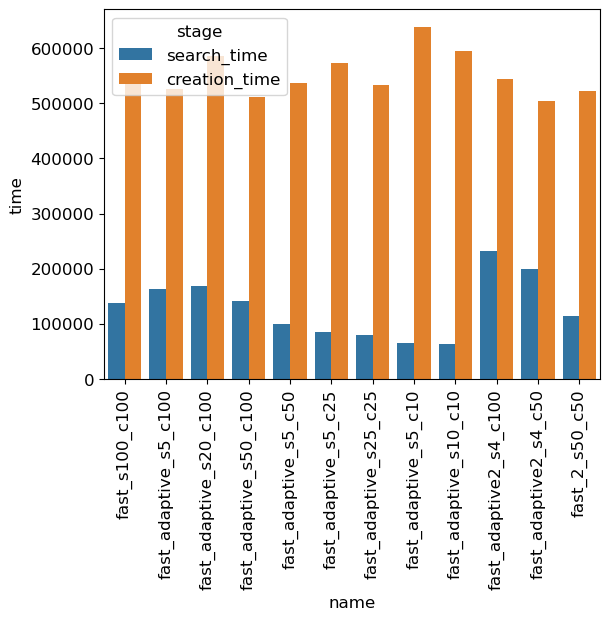

In [5]:
summary = pd.DataFrame(search_time)
summary = summary.melt(id_vars=['name'], var_name='stage', value_name='time')

sns.barplot(x='name', y='time', hue='stage', data=summary)
plt.xticks(rotation=90)